# **Análise dos Dados do Airbnb - Irlanda**

O Airbnb é considerado como a maior empresa hoteleira da atualidade, a empresa hoteleira não possui nenhum hotel, tendo como modelo de negócio conectar pessoas que buscam um local para se hospedar em uma viagem com aquelas que podem oferecer uma hospedagem em troca de diárias (hospedagem).

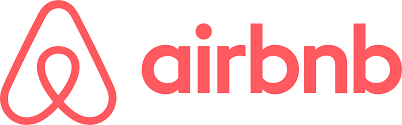 

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas da Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo.

Neste notebook, iremos analisar os dados referentes à Irlanda, e ver quais insights podem ser extraídos a partir de dados brutos.

## Um Pouco Sobre a Irlanda 

A República da Irlanda, mais conhecida somente como Irlanda, é um Estado europeu com soberania que ocupa grande parte da ilha homônima. Seu sistema político é o constitucionalismo e a governança da república ocorre através de uma democracia parlamentar que tem o presidente como maior autoridade. A Irlanda é categorizada como uma nação desenvolvida da Europa. 

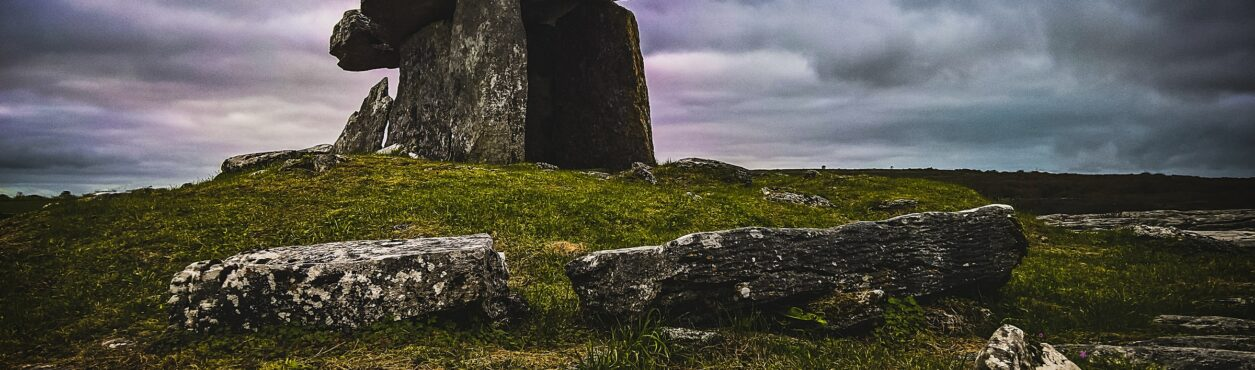

Obtenção de Dados


In [ ]:
#importar os pacotes necessarios 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sea 

%matplotlib inline 

In [ ]:
# importar o arquivo listings.csv para um DataFrame

# Data set
# "http://data.insideairbnb.com/ireland/2021-06-27/visualisations/listings.csv"

df = pd.read_csv("http://data.insideairbnb.com/ireland/2021-06-27/visualisations/listings.csv")

## **Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados



### Dicionário das variáveis:



* **id** - Numero gerado como identificador do Imóvel

* **name** - Nome da propriedade do anunciante

* **host_id** - Nome do anfitrião

* **neighbourhood_group** - Coluna sem valor válido

* **neighbourhood** - Nome do bairro

* **latitude** - Coordenada da latitude da propriedade

* **longitude** - Coordenada da longitude da propriedade

* **room_type** - Informa o tipo de quarto que é oferecido

* **price** - Preço para alugar o imóvel

* **minimun_nights** - Noites minimas para conseguir alugar o imóvel

* **number_of_reviews** - Número de reviews que o imóvel possui

* **last_review** - Data da última review

* **reviews_per_month** - Quantidade de reviews por mês

* **calculate_host_listings_count** - Quantidade de imóvel que o dono possui

* **availibility_365** - Número de dias que o imóvel esta disponivel duranto o ano
(365 dias)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [ ]:
#Verificando um resumo do Data Frame

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,reviews_per_month,calculated_host_listings_count,availability_365
count,2.693500e+04,2.693500e+04,26935.000000,26935.000000,2.693500e+04,26935.000000,26935.000000,26935.000000,21881.000000,26935.000000,26935.000000
mean,2.760964e+07,1.237080e+08,53.142484,-7.895855,1.972101e+02,4.549991,34.724002,4.727344,1.256297,11.925116,154.202822
std,1.407293e+07,1.089283e+08,0.849543,1.419012,7.186154e+03,26.508875,62.507484,9.711666,1.834655,50.415622,134.307461
min,1.153200e+04,4.246700e+04,51.431330,-10.539890,0.000000e+00,1.000000,0.000000,0.000000,0.010000,1.000000,0.000000
25%,1.705146e+07,3.195736e+07,52.505755,-9.207225,6.000000e+01,1.000000,1.000000,0.000000,0.230000,1.000000,0.000000
50%,2.676321e+07,9.093287e+07,53.316540,-8.031950,9.300000e+01,2.000000,10.000000,0.000000,0.730000,1.000000,134.000000
75%,3.939577e+07,1.925155e+08,53.421845,-6.280783,1.500000e+02,3.000000,40.000000,5.000000,1.650000,3.000000,292.000000
max,5.065480e+07,4.091276e+08,55.381210,-6.014410,1.173721e+06,1125.000000,1284.000000,232.000000,103.420000,388.000000,365.000000


In [ ]:
# Mostrando as 10 primeiras colunas
df.head(10)

##Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. 

In [ ]:
#Função para converter valores para BR
def val_br(x):
  valor = x  
  Variavel = f'{valor:_.2f}'
  Variavel = Variavel.replace('.',',').replace('_','.')
  return Variavel
  

In [ ]:
#indentificar o volume de dados do DataFrame
Linha = val_br(df.shape[0])
Coluna = val_br(df.shape[1]) 

print(f'Nosso DataFrame possui {Linha} Variáveis/Linhas e {Coluna} Entradas/Colunas.\n')

#verificar as 5 primeiras entradas do DataSet(verificar cada tipo de variavel)
display(df.dtypes)

Nosso DataFrame possui 26.935,00 Variáveis/Linhas e 17,00 Entradas/Colunas.



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##Q2. Qual a porcentagem de valores ausentes no dataset?
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. 

É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# ordenar em ordem descrescente as variáveis por seus valores ausentes
# a função sort_values serve para ordenar de forma crescente ou decrescente

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.187637
last_review                       0.187637
host_name                         0.024244
name                              0.000074
availability_365                  0.000000
latitude                          0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
room_type                         0.000000
longitude                         0.000000
calculated_host_listings_count    0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

Pode-se notar que os **usuários do Airbnb na Irlanda são bem participativos**, tendo tendo menos que 20% de valores faltantes nos reviews (reviews_per_month e last_review) que **são as colunas que mais possui valores faltantes**. Nos gerando a pergunta: "O que leva o nosso hóspede a não dar sua opinião ao sair do Airbnb?" 


A variável host_name têm aproximadamente 0,025% dos valores nulos.


A variável name têm aproximadamente 0,00074% dos seus valores nulos.

##Q3. Qual o tipo de distribuição das variáveis?

Irei utilizar o histograma para verificar a distrubuição de varia´veis devido a facilidade em sua visualização.

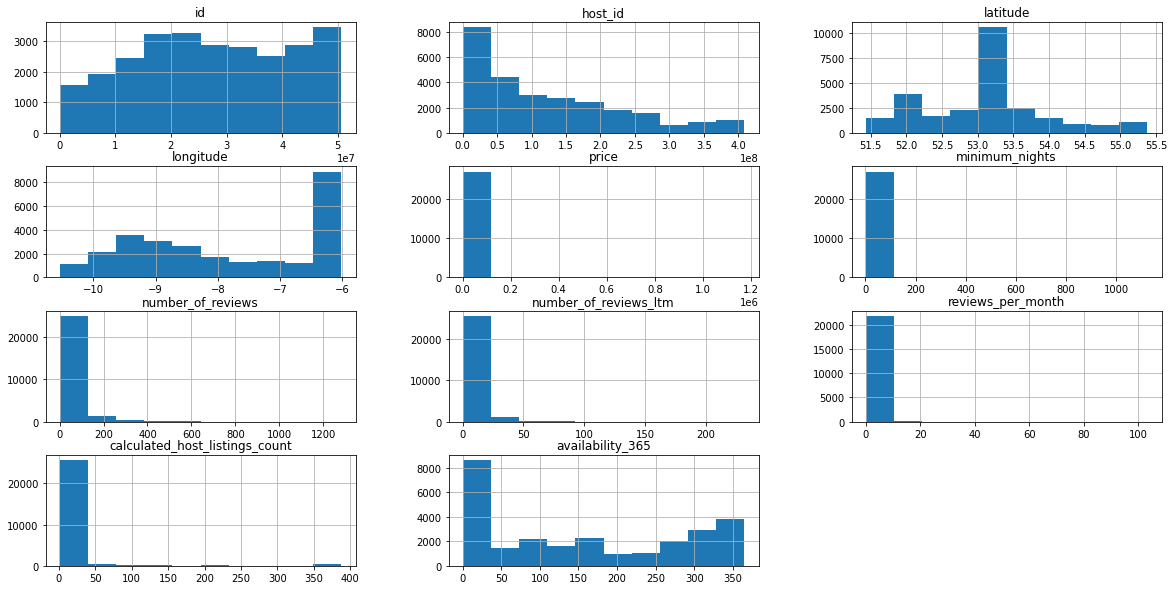

In [ ]:
#plotar o histograma das variaveis numéricas
df.hist(bins=10, figsize=(20,10));

##Q4. Há outliers presentes?

Ao analisar o histograma podemos verificar alguns outliers nas variáveis, *availabily_365*, *calculated_host_listings_count* e *price* no qual apresenta alguns valores ao extremo que não seguem o raciocínio do gráfico.

Para confirmar isso exitem duas maneira que auxiliam a detecção de outliers. São elas:

* Resumo estatistico por meio do metodo describe()
* Plotar Boxplot para a variável

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.693500e+04,26935.000000,26935.000000,21881.000000,26935.000000,26935.000000
mean,1.972101e+02,4.549991,34.724002,1.256297,11.925116,154.202822
std,7.186154e+03,26.508875,62.507484,1.834655,50.415622,134.307461
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,6.000000e+01,1.000000,1.000000,0.230000,1.000000,0.000000
50%,9.300000e+01,2.000000,10.000000,0.730000,1.000000,134.000000
75%,1.500000e+02,3.000000,40.000000,1.650000,3.000000,292.000000
max,1.173721e+06,1125.000000,1284.000000,103.420000,388.000000,365.000000


**Pode-se confirmar com o estatístico através da função *describe* que:**

* O valor mínimo *(price)* do preço apresenta-se como **0**, não sendo possível a existência de um valor assim, tratando-se de alugueis no Airbnb. 

* O mesmo padrão repete-se com o números de dias que o imóvel está disponível *(availability_365)*, caso fosse possível a não permanência do imóvel, ele seria retirado da plataforma.

* Há também uma discrepância dos dados no que se trata de noite mínima *(mininum_nights)* que apresenta 1125

* Há uma baixa quantidade de *reviews* por mês, o que pode indicar que há pouco turismo


**Boxplot para price**

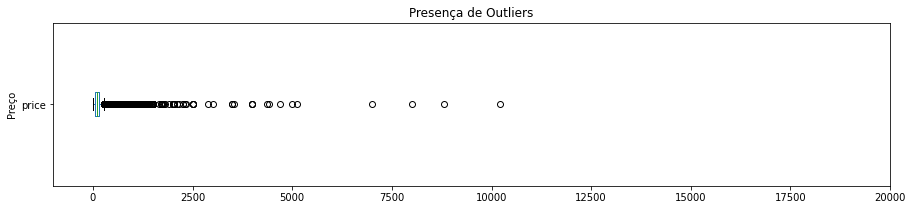

Há 3 preços abaixo ou igual a 0, representando: 0.01% do nosso dataset

Há 32 preços acima de 10000 euros, representando: 0.12% do nosso dataset


In [ ]:
df.price.plot(kind='box', 
              vert=False, 
              xlim=(-1000,20000), 
              figsize=(15,3), 
              ylabel = 'Preço', 
              title = 'Presença de Outliers');
plt.show()

#Verificando quantidade de valores de valores discrepantes

print(f'Há {len(df[df.price <=0])} preços abaixo ou igual a 0, representando: {((len(df[df.price <=0]) / df.shape[0])*100):.2f}% do nosso dataset\n')
print(f'Há {len(df[df.price >10000])} preços acima de 10000 euros, representando: {((len(df[df.price >10000]) / df.shape[0])*100):.2f}% do nosso dataset')


Verificado através do boxplot que há pontos discrepantes acima do valor target selecionado, mostrando que não há somente valores próximo e abaixo de 0, como valores muito acima do padrão.

**Boxplot para calculated_host_listings_count** 

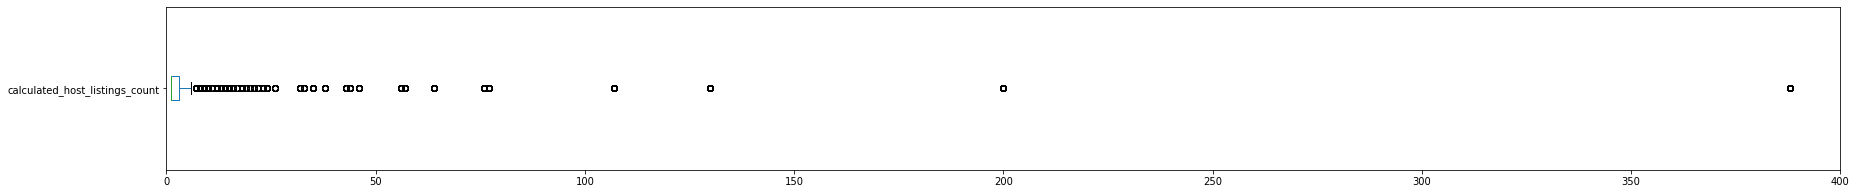

Temos 1155 valores acima de 50 unidades. Representando 4.29%


In [ ]:
df.calculated_host_listings_count.plot(kind='box',
                                      vert=False,
                                      xlim=(0,400),
                                      figsize=(30,3))
plt.show()

#Verificando a quantidade de valores acima 50 unidades
print(f'Temos {(len(df[df.calculated_host_listings_count > 50]))} valores acima de 50 unidades. Representando {((len(df[df.calculated_host_listings_count > 50]) / df.shape[0]) *100):.2f}%')

Através desse boxplot podemos ter os seguintes insights 💡

* Quem possui mais de 50 imóveis? São empresas especializadas em locação?

* O que trás grandes locatários a utilizar o AirBnb?

* Há uma possível fraude no cadastramento de imóveis?



**Boxplot para minimum_nights**




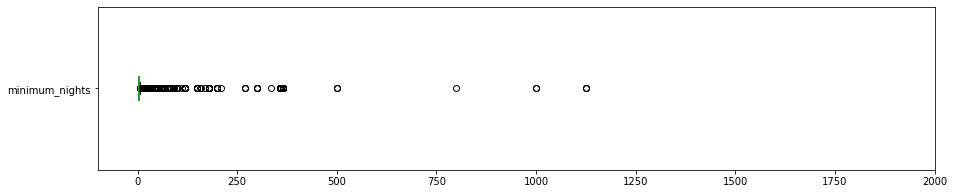

Temos 227 valores acima de 30 dias. Representando 0.84%


In [ ]:
#Gerando gráfico Minimun_nights (Mínimo de noite dormidas)
df.minimum_nights.plot(kind='box', 
                       vert=False,
                       xlim=(-100, 2000),
                       figsize=(15,3))
plt.show()

#Verificando a quantidede de valores acima de 30 dias
print(f'Temos {(len(df[df.minimum_nights > 30]))} valores acima de 30 dias. Representando {((len(df[df.minimum_nights >30]) / df.shape[0]) *100):.2f}%')

Pode-se notar que temos vários outliers nas noites mínimas.

###Histogramas sem outliers

Já que identificamos outliers nas variáveis *price*, *calculated_host_listings_count* e *minimum_nights*, vamos agora limpar o DataFrame e plotar novamente o histograma para verificar a disposição dos dados.

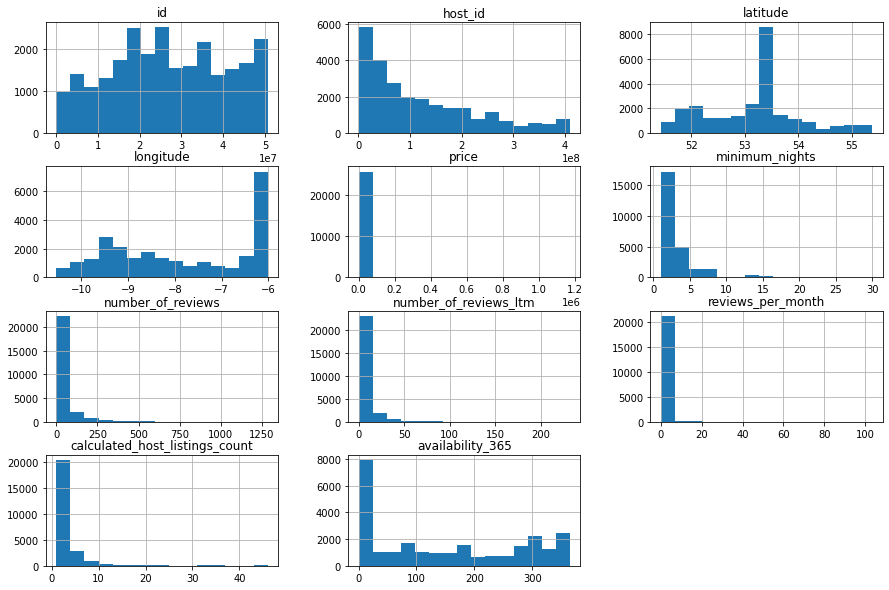

In [ ]:
#remover outliers em um novo DataFrame.
new_df = df.copy()
new_df.drop(new_df[new_df.price <= 0].index, axis =0, inplace = True)
new_df.drop(new_df[new_df.calculated_host_listings_count > 50].index, axis=0, inplace=True)
new_df.drop(new_df[new_df.minimum_nights > 30].index, axis = 0, inplace = True)

#Removendo a vazia (neighbourdhood_group)
new_df.drop('neighbourhood_group', axis=1, inplace =True)

#Realizando o gráfico novamente (Histograma), com o novo dataframe limpo.
new_df.hist(bins=15, figsize=(15,10));

##Q5. Qual a correlação existente entre as variáveis?
Correlação significa que existe relação entre duas ou mais coisas. No nosso contexto estamos buscando relação entre duas variáveis.

Essa relação pode ser medida e é função do coeficiente estabelecer qual a intensidade dela.

Podemos fazer isso atravez de:

Criar uma matriz de correlação.
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn.

In [ ]:
#criar uma matriz de correlação com matrizes selecionadas 
corr = new_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.000578,-0.006076,-0.020671,0.000275,0.004657
minimum_nights,0.000578,1.000000,-0.069717,-0.084244,0.097939,-0.058983
number_of_reviews,-0.006076,-0.069717,1.000000,0.597526,-0.041346,0.078571
reviews_per_month,-0.020671,-0.084244,0.597526,1.000000,-0.014102,0.090196
calculated_host_listings_count,0.000275,0.097939,-0.041346,-0.014102,1.000000,0.075020
availability_365,0.004657,-0.058983,0.078571,0.090196,0.075020,1.000000


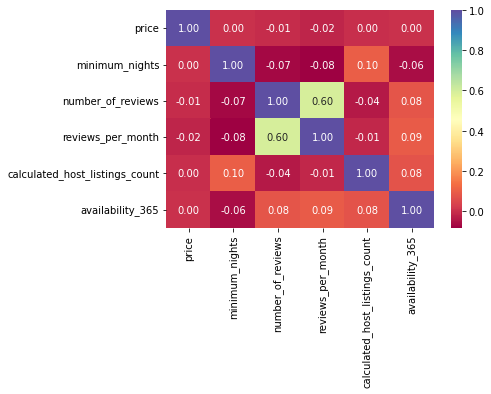

In [ ]:
#Gerando um gráfico de calor à partir da matriz gerada
sea.heatmap(corr,cmap='Spectral', fmt='.2f', linecolor='blue', annot=True);

#Q6. Qual o tipo de imóvel mais alugado no Airbnb?


A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. No site, existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.


Agora vamos analisar qual o tipo de imóvel mais alugado de acordo com as colunas *room_type* que indica o tipo de imóvel e usando o método value_counts() que nos diz quantas vezes houve a ocorrência.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
new_df.room_type.value_counts()

Entire home/apt    15042
Private room       10100
Hotel room           243
Shared room          221
Name: room_type, dtype: int64

In [ ]:
#mostrar a porcentagem de cada tipo de imóvel disponível
new_df.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.565893
Private room       0.379971
Hotel room         0.009142
Shared room        0.008314
Name: room_type, dtype: float64


##Quais as localidades mais caras da Irlanda?

Uma maneira de se verificar uma variável em função da outra é usando *groupby()*.

Neste caso, queremos comparar a entrada dos bairros *(neighbourhoods)* a partir da entrada do preço de locação *(price)*.

In [ ]:
#Rank das 10 localidades mais caras:
new_df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Kimmage-Rathmines LEA-6       3157.716883
Roscommon LEA-6                558.652174
Cappamore-Kilmallock LEA-7     402.191781
Rosslare LEA-5                 345.362694
Wexford LEA-7                  338.793478
Lismore LEA-3                  291.789474
Kenmare LEA-6                  283.004766
Granard LEA-5                  244.058824
Dundalk South LEA-7            236.535714
Dundalk-Carlingford LEA-6      229.017341
Name: price, dtype: float64

Podemos verificar através da análise que Kimmage-Rathmines é o bairro mais caro da Irlanda.

##Quais as localidades mais barata da Irlanda?


In [ ]:
#Rank das 10 localidades mais baratas:
new_df.groupby(['neighbourhood']).price.mean().sort_values(ascending = True)[:10]


neighbourhood
Tallaght South LEA-5          48.360000
Tallaght Central LEA-6        50.315789
Lucan LEA-5                   55.500000
Limerick City East LEA-7      55.666667
Leixlip LEA-3                 58.583333
Donaghmede LEA-5              62.318681
Cork City South West LEA-7    64.250000
Palmerstown-Fonthill LEA-5    64.714286
Swords LEA-7                  68.030303
Carlow LEA-7                  69.394737
Name: price, dtype: float64

Os dados acima mostra as cidades mais baratas da Irlanda.

Gerando gráfico de mapa para verificar a disposição de locações em Airbnb.

**Gráfico de Dispersão**


Utilizaremos as informações de longitude e latitude para verificarmos a dispersão por preço.

## Mapa da Irlanda

*File:MapaGeneralDeIrlanda.svg - Wikimedia Commons*

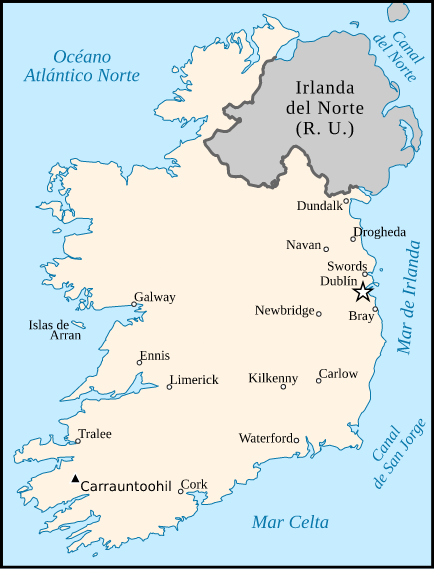

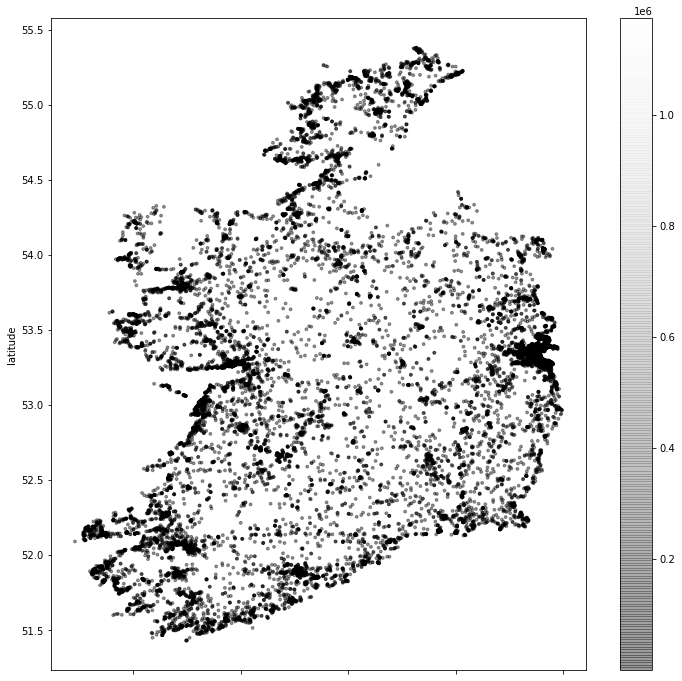

In [ ]:
# plotar os imóveis pela latitude-longitude
new_df.plot(kind="scatter", 
        x='longitude', 
        y='latitude', 
        alpha=0.4, 
        c=new_df['price'], 
        s=8,
        cmap=plt.get_cmap('Greys_r'), 
        figsize=(12,12));

###Imóveis

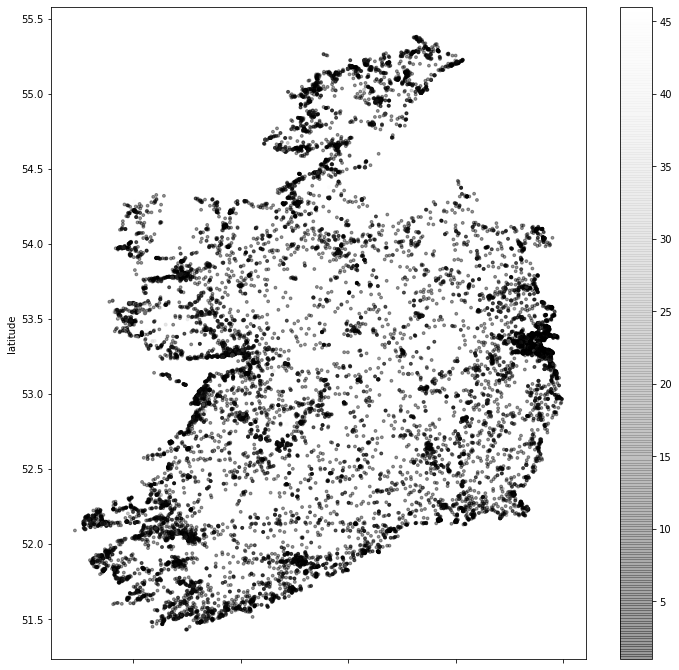

In [ ]:
#Gráfico de Imóveis de Airbnb
new_df.plot(kind="scatter", 
        x='longitude', 
        y='latitude', 
        alpha=0.4, 
        c=new_df['calculated_host_listings_count'], 
        s=8,
        cmap=plt.get_cmap('Greys_r'), 
        figsize=(12,12));

###Qual cidade é mais disponível?


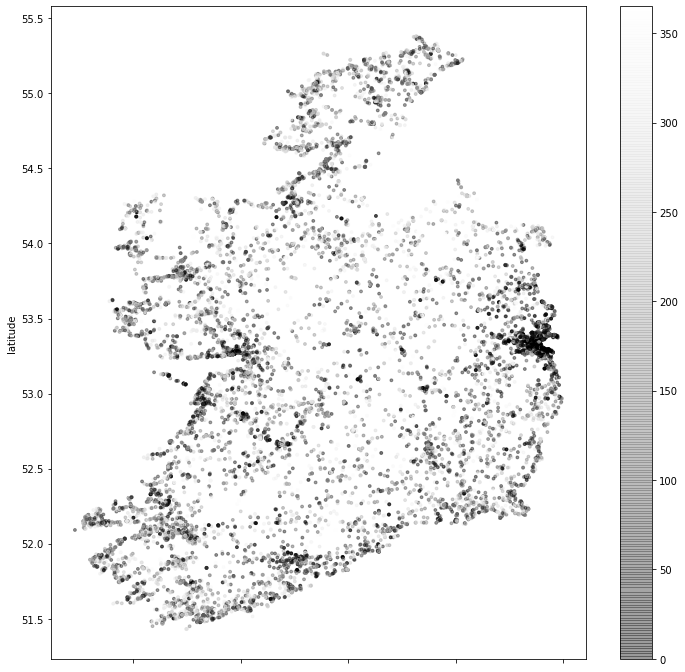

In [ ]:
new_df.plot(kind="scatter", 
        x='longitude', 
        y='latitude', 
        alpha=0.4, 
        c=new_df['availability_365'], 
        s=8,
        cmap=plt.get_cmap('Greys_r'), 
        figsize=(12,12));


Com base nesta análise podemos verificar que temos uma maior disponibilidade de Airbnb’s na faixa litorânea de todo país.
Quando olhamos a região de Dublin, capital da Irlanda e maior centro econômico do país, não só temos uma maior concentração de Airbnb’s disponíveis, mas também uma maior disponibilidade ao longo do ano, reflexo do alto custo das acomodações, que podem chegar a valores como:

**Kimmage-Rathmines** - 3157.716883

**Roscommon** - 558.652174

**Cappamore-Kilmallock** - 402.191781




# **Conclusão**

Conclusão

* Analisando os dados disponibilizados pela Airbnb na Irlanda, foi possível observar a presença de outliers em algumas variáveis como também a correlação entre alguns valores (Preço x Disponibilidade x Localidade).

* Também concluímos que há uma grande concentração de imóveis na área litorânea, já que temos uma maior variedade de pontos turístico nesses locais, o mesmo acontece no interior do país onde nos locais com pontos turísticos possuem uma maior concentração de Airbnb’s. Mostrando uma situação adversa enquanto disponibilidade em dias e imóveis em algumas regiões no interior do país e próximo à Irlanda do Norte.

* Reforçamos que o DataSet utilizado nesta análise, trata-se de uma amostra dos dados disponibilizados de forma gratuita pela empresa, o que não representam a realidade da localidade e/os todos os dados que a empresa possui sobre este país.

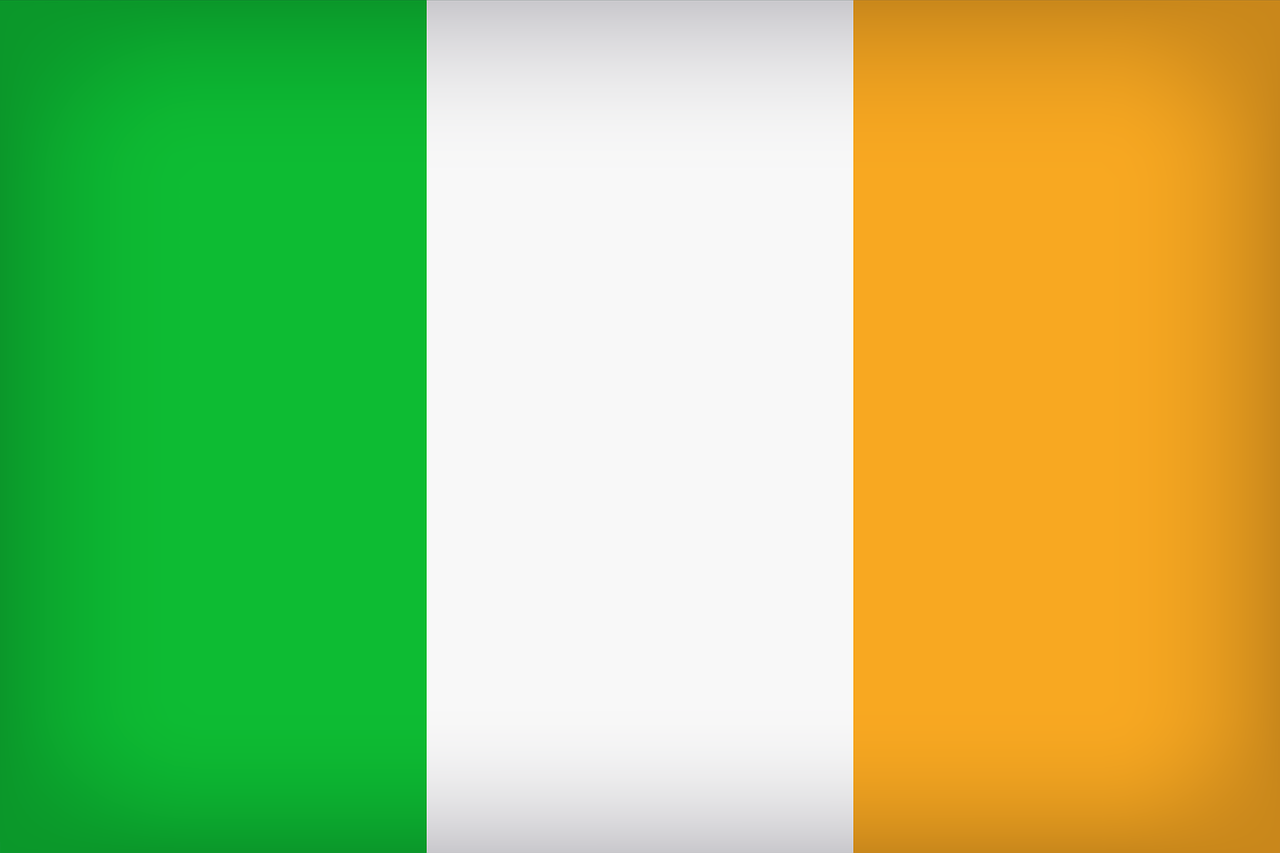